# QREL Data Analysis

## Instructions

To properly use this notebook, refer to the readme.md file in the root folder

## Project Setup


### Project imports

In [603]:
# Importing popular data science libraries
import pandas as pd # for data manipulation and analysis
import numpy as np #  for working with arrays - has functions working with linear algebra, fourier transform and matrices
import matplotlib.pyplot as plt # creating static, animated and interactive visualizations in Python
import seaborn as sns # provides high-level interface for drawing attractive and informative statistical graphics

# Miscallaneous imports
import os # for file loading

In [604]:
# To get your current path
current_folder = os.getcwd()

print(f"The current folder path is: {current_folder}")

The current folder path is: /Users/kevinhtw/Documents/UM-BCS/SEM 6/WIE2005:WIE3004 Information Retrieval and Web Search/data-analysis


### Loading data

In [ ]:
# Set the paths to your own folder here
input_files_folder_path = current_folder + "/input"

qrel_file_name = "qrels.trec8.adhoc" # change this according to your QREL file name
qrel_file_path = current_folder + "/" + qrel_file_name

# For debugging, ignore
print(f"Input files path: {input_files_folder_path}")
print(f"Number of files found: {len(os.listdir(input_files_folder_path))}")
print(f"Path has files? >> {os.path.exists(input_files_folder_path)} \n{os.listdir(input_files_folder_path)}")

print(f"\nQREL file path: {qrel_file_path}")
print(f"QREL file found? >> {os.path.isfile(qrel_file_path)}")

Input files path: /Users/kevinhtw/Documents/UM-BCS/SEM 6/WIE2005:WIE3004 Information Retrieval and Web Search/data-analysis/input
Number of files found: 15
Path has files? >> True 
['input.ok8amxc', 'input.plt8ah1', 'input.GE8MTD2', 'input.apl8c221.apl8c221', 'input.Scai8Adhoc', 'input.isa25t', 'input.ric8dpn', 'input.UB99T', 'input.1.1', 'input.Flab8ax', 'input.mds08a2', 'input.iit99au1', 'input.Dm8Nbn', 'input.att99ate', 'input.MITSLStd']

QREL file path: /Users/kevinhtw/Documents/UM-BCS/SEM 6/WIE2005:WIE3004 Information Retrieval and Web Search/data-analysis/qrels.trec8.adhoc
QREL file found? >> True


#### Loading input data

In [606]:
dataset = pd.DataFrame()
input_files = os.listdir(input_files_folder_path)
input_file_cols = ['query_id', 'placeholder', 'doc_id', 'rank', 'score', 'input_file']

for input_file in input_files:
    input_file_path = os.path.join(input_files_folder_path, input_file)
    df = pd.read_csv(
        input_file_path, 
        sep='\t',  # tab-separated
        header=None, 
        names=input_file_cols
    )
    df['input_file'] = str(input_file).replace('input.', '').strip()  # Add correct file name as a column
    dataset = pd.concat([dataset, df], ignore_index=True)

dataset

,query_id,placeholder,doc_id,rank,score,input_file
0,401,Q0,FBIS4-18182,0,3.590320,ok8amxc
1,401,Q0,FBIS3-18916,1,3.449360,ok8amxc
2,401,Q0,FBIS3-18833,2,3.408860,ok8amxc
3,401,Q0,FBIS3-39117,3,3.253320,ok8amxc
4,401,Q0,FBIS3-17077,4,3.154300,ok8amxc
...,...,...,...,...,...,...
724607,450,Q0,FT933-6066,996,-0.356903,MITSLStd
724608,450,Q0,FBIS4-6814,997,-0.356962,MITSLStd
724609,450,Q0,LA121190-0027,998,-0.358896,MITSLStd
724610,450,Q0,FBIS4-51493,999,-0.358901,MITSLStd


#### Loading QREL data

In [607]:
# Getting data from QREL file
qrel_file_cols = [
  'query_id', 'placeholder', 'doc_id', 'relevance' 
]

qrel = pd.read_csv(
  qrel_file_path,
  sep=r'\s+', # qrel file uses whitespaces as delimiter
  names=qrel_file_cols,
  header=None
)

qrel # preview the qrel file

,query_id,placeholder,doc_id,relevance
0,401,0,FBIS3-10009,0
1,401,0,FBIS3-10059,0
2,401,0,FBIS3-10142,0
3,401,0,FBIS3-1026,0
4,401,0,FBIS3-10502,0
...,...,...,...,...
86825,450,0,LA123090-0138,0
86826,450,0,LA123090-0146,0
86827,450,0,LA123090-0176,0
86828,450,0,LA123090-0195,0


## Exploratory Data Analysis & Data Cleaning

### Input files

Here, we check for any missing data and to find out the general trends of our input files dataset

In [608]:
print(dataset.head()) # before
dataset.drop(columns='placeholder', inplace=True)
print(dataset.head()) # after

   query_id placeholder       doc_id  rank    score input_file
0       401          Q0  FBIS4-18182     0  3.59032    ok8amxc
1       401          Q0  FBIS3-18916     1  3.44936    ok8amxc
2       401          Q0  FBIS3-18833     2  3.40886    ok8amxc
3       401          Q0  FBIS3-39117     3  3.25332    ok8amxc
4       401          Q0  FBIS3-17077     4  3.15430    ok8amxc
   query_id       doc_id  rank    score input_file
0       401  FBIS4-18182     0  3.59032    ok8amxc
1       401  FBIS3-18916     1  3.44936    ok8amxc
2       401  FBIS3-18833     2  3.40886    ok8amxc
3       401  FBIS3-39117     3  3.25332    ok8amxc
4       401  FBIS3-17077     4  3.15430    ok8amxc


In [609]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724612 entries, 0 to 724611
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   query_id    724612 non-null  int64  
 1   doc_id      724612 non-null  object 
 2   rank        724612 non-null  int64  
 3   score       724612 non-null  float64
 4   input_file  724612 non-null  object 
dtypes: float64(1), int64(2), object(2)
memory usage: 27.6+ MB


Turns out that the doc_id and input_file columns are somehow of the type 'object'. Let's fix that

In [610]:
dataset['query_id'] = dataset['query_id'].astype(int)
dataset['doc_id'] = dataset['doc_id'].astype('string')
dataset['input_file'] = dataset['input_file'].astype('string')

In [611]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724612 entries, 0 to 724611
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   query_id    724612 non-null  int64  
 1   doc_id      724612 non-null  string 
 2   rank        724612 non-null  int64  
 3   score       724612 non-null  float64
 4   input_file  724612 non-null  string 
dtypes: float64(1), int64(2), string(2)
memory usage: 27.6 MB


In [612]:
dataset

,query_id,doc_id,rank,score,input_file
0,401,FBIS4-18182,0,3.590320,ok8amxc
1,401,FBIS3-18916,1,3.449360,ok8amxc
2,401,FBIS3-18833,2,3.408860,ok8amxc
3,401,FBIS3-39117,3,3.253320,ok8amxc
4,401,FBIS3-17077,4,3.154300,ok8amxc
...,...,...,...,...,...
724607,450,FT933-6066,996,-0.356903,MITSLStd
724608,450,FBIS4-6814,997,-0.356962,MITSLStd
724609,450,LA121190-0027,998,-0.358896,MITSLStd
724610,450,FBIS4-51493,999,-0.358901,MITSLStd


#### Number of entries from each file

In [613]:
dataset.input_file.value_counts()

input_file
ok8amxc              50000
GE8MTD2              50000
apl8c221.apl8c221    50000
ric8dpn              50000
UB99T                50000
Flab8ax              50000
mds08a2              50000
Dm8Nbn               50000
att99ate             50000
MITSLStd             50000
isa25t               49065
iit99au1             48766
plt8ah1              48259
Scai8Adhoc           47182
1.1                  31340
Name: count, dtype: Int64

### QREL file
We explore the structure of the file here and examine some of its metadata

We don't need the placeholder so we're getting rid of that

In [614]:
qrel.drop(columns="placeholder", inplace=True)
qrel

,query_id,doc_id,relevance
0,401,FBIS3-10009,0
1,401,FBIS3-10059,0
2,401,FBIS3-10142,0
3,401,FBIS3-1026,0
4,401,FBIS3-10502,0
...,...,...,...
86825,450,LA123090-0138,0
86826,450,LA123090-0146,0
86827,450,LA123090-0176,0
86828,450,LA123090-0195,0


In [615]:
qrel.relevance.value_counts()

relevance
0    82102
1     4728
Name: count, dtype: int64

This shows that the relevance column only has two possible values: 0s and 1s - with 0s representing an irrelevant document and vice versa with 1s

### Utility functions
Just a few reusable functions that help to speed up the process of analysis

#### Get unique topics

In [616]:
# @input dataset: DataFrame = aggregated data set
# @input input_file: string = name of run
#
# Returns a list of unique queries in an input file
def get_unique_topics(dataset, input_file, verbose = False):
  query_rows = dataset[dataset['input_file'] == input_file]
  unique_queries_list = query_rows['query_id'].unique()

  if verbose:
    print(f"There are {len(unique_queries_list)} unique topics")
    
  return unique_queries_list

#### Get unique input files

In [617]:
# @input none
#
# Returns a list of all unique topics for an input file
def get_input_files():
  unique_input_files = os.listdir(input_files_folder_path)

  for index, input_file in enumerate(unique_input_files):
    unique_input_files[index] = str(unique_input_files[index]).replace('input.', '').strip()
  
  return unique_input_files

## Result & Analysis
In this section, we calculate some important metrics to evaluate the effectiveness of each search engine's results

### Mean Average Precision (MAP)
MAP is the mean of average precisions (APs) across multiple queries. So, in order to calculate that, we would need to calculate the APs of the queries in a single input file. The formula for average precision is:

> Average Precision (AP) = 1 / (N) * ( sum of (P(k) * rel(k)) )

where N = total number of relevant documents, P(k) is the precision at rank k, and rel(k) = 1 if the document is relevant and 0 otherwise

For instance, take the table below which is a list of documents returned for query A:

| Rank | Doc ID       | Relevance |
|------|--------------|-----------|
| 1    | FBIS4-20472  | 1         |
| 2    | FBIS4-68893  | 0         |
| 3    | FR941117...  | 1         |
| 4    | FBIS3-37947  | 0         |
| 5    | FBIS4-29     | 1         |

Then:

At rank 1: Precision = 1/1 = 1.0

At rank 3: Precision = 2/3 ≈ 0.667

At rank 5: Precision = 3/5 = 0.6

___

With that being said, let's modify our dataset by joining in the relevance judgment file

In [618]:
qrel.head() # as a recap, this is how the QREL file looks like

,query_id,doc_id,relevance
0,401,FBIS3-10009,0
1,401,FBIS3-10059,0
2,401,FBIS3-10142,0
3,401,FBIS3-1026,0
4,401,FBIS3-10502,0


In [619]:
dataset_merged = pd.merge(
  dataset,
  qrel[['query_id', 'doc_id', 'relevance']],
  on=['query_id', 'doc_id'],
  how='left'
)
dataset_merged

,query_id,doc_id,rank,score,input_file,relevance
0,401,FBIS4-18182,0,3.590320,ok8amxc,0.0
1,401,FBIS3-18916,1,3.449360,ok8amxc,0.0
2,401,FBIS3-18833,2,3.408860,ok8amxc,0.0
3,401,FBIS3-39117,3,3.253320,ok8amxc,0.0
4,401,FBIS3-17077,4,3.154300,ok8amxc,0.0
...,...,...,...,...,...,...
724607,450,FT933-6066,996,-0.356903,MITSLStd,NaN
724608,450,FBIS4-6814,997,-0.356962,MITSLStd,NaN
724609,450,LA121190-0027,998,-0.358896,MITSLStd,0.0
724610,450,FBIS4-51493,999,-0.358901,MITSLStd,NaN


Apparently there are some null values for relevance. Let's find out how many are null

In [620]:
dataset_merged.relevance.value_counts()

relevance
0.0    272717
1.0     35722
Name: count, dtype: int64

In [621]:
dataset_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724612 entries, 0 to 724611
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   query_id    724612 non-null  int64  
 1   doc_id      724612 non-null  object 
 2   rank        724612 non-null  int64  
 3   score       724612 non-null  float64
 4   input_file  724612 non-null  string 
 5   relevance   308439 non-null  float64
dtypes: float64(2), int64(2), object(1), string(1)
memory usage: 33.2+ MB


This signifies that there are only about 300,000 entries with non-null values. Let's fill up the null values with 0, that is assuming that they are not relevant as they are not judged

In [622]:
dataset_merged['relevance'] = dataset_merged['relevance'].fillna(0).astype(int)
dataset_merged['relevance'] = dataset_merged['relevance'].astype(int)
dataset_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724612 entries, 0 to 724611
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   query_id    724612 non-null  int64  
 1   doc_id      724612 non-null  object 
 2   rank        724612 non-null  int64  
 3   score       724612 non-null  float64
 4   input_file  724612 non-null  string 
 5   relevance   724612 non-null  int64  
dtypes: float64(1), int64(3), object(1), string(1)
memory usage: 33.2+ MB


In [623]:
dataset_merged.relevance.value_counts()

relevance
0    688890
1     35722
Name: count, dtype: int64

#### Average Precision Function

In [624]:
# Calculates the average precision of a query
# query = int, input_file = string
def average_precision(query_id, input_file, verbose = False):
  # Collect all the rows for a query
  rows = dataset_merged[
    (dataset_merged['query_id'] == query_id) & 
    (dataset_merged['input_file'] == input_file)
  ]

  # Calculate precision for all documents in that query
  relevance_values = rows.sort_values('rank')['relevance'].values
  precisions = []
  number_of_related_docs = 0

  for index, relevance_value in enumerate(relevance_values, start=1): # start at index 1 to skip the header
    doc_is_relevant = (relevance_value == 1)
    if doc_is_relevant:
      number_of_related_docs += 1
      precisions.append(
        number_of_related_docs / index # formula for precision
      )
      
  if verbose:
    print(precisions)
    print(f"There are {len(precisions)} relevant documents for query {query_id}")

  # Calculate AP
  return sum(precisions) / number_of_related_docs if number_of_related_docs > 0 else 0.0

In [625]:
average_precision(401, '1.1')

0.017094906463985617

#### Mean Average Precision (MAP) Function

In [ ]:
# input_file: string = name of the input file
def mean_average_precision(input_file, verbose = False):
  # Fetch the number of unique query_ids
  unique_queries_list = get_unique_topics(dataset_merged, input_file, verbose)
  
  # Iterate over all query_ids using average_precision function
  sum_of_average_precisions = 0.0

  for query_id in unique_queries_list:
    sum_of_average_precisions += average_precision(query_id, input_file, verbose)

  mean_average_precision = sum_of_average_precisions / len(unique_queries_list)

  if verbose:
    print(f"The mean average precision for {input_file} is {mean_average_precision}")

  return mean_average_precision

In [627]:
mean_average_precision('1.1')

0.02659463727377825

Now that we have the mean_average_precision calculation done, let's generate a table to get a better view

In [636]:
mean_average_precision_table = pd.DataFrame({
  'input_file': [], 'mean_average_precision': []
})

# Calculate MAP iteratively for all runs
for input_file in get_input_files():
  input_file_map = mean_average_precision(input_file)
  row = pd.DataFrame({ 'input_file': [input_file], 'mean_average_precision': [input_file_map]})

  mean_average_precision_table = pd.concat([mean_average_precision_table, row], ignore_index=True)

mean_average_precision_table.index = mean_average_precision_table.index + 1 # just so the first file appears as number 1 on the list

mean_average_precision_table

,input_file,mean_average_precision
1,ok8amxc,0.370851
2,plt8ah1,0.233204
3,GE8MTD2,0.385602
4,apl8c221.apl8c221,0.355809
5,Scai8Adhoc,0.214368
6,isa25t,0.096457
7,ric8dpn,0.325525
8,UB99T,0.117923
9,1.1,0.026595
10,Flab8ax,0.371684


A bar graph would help to see which runs performed the best

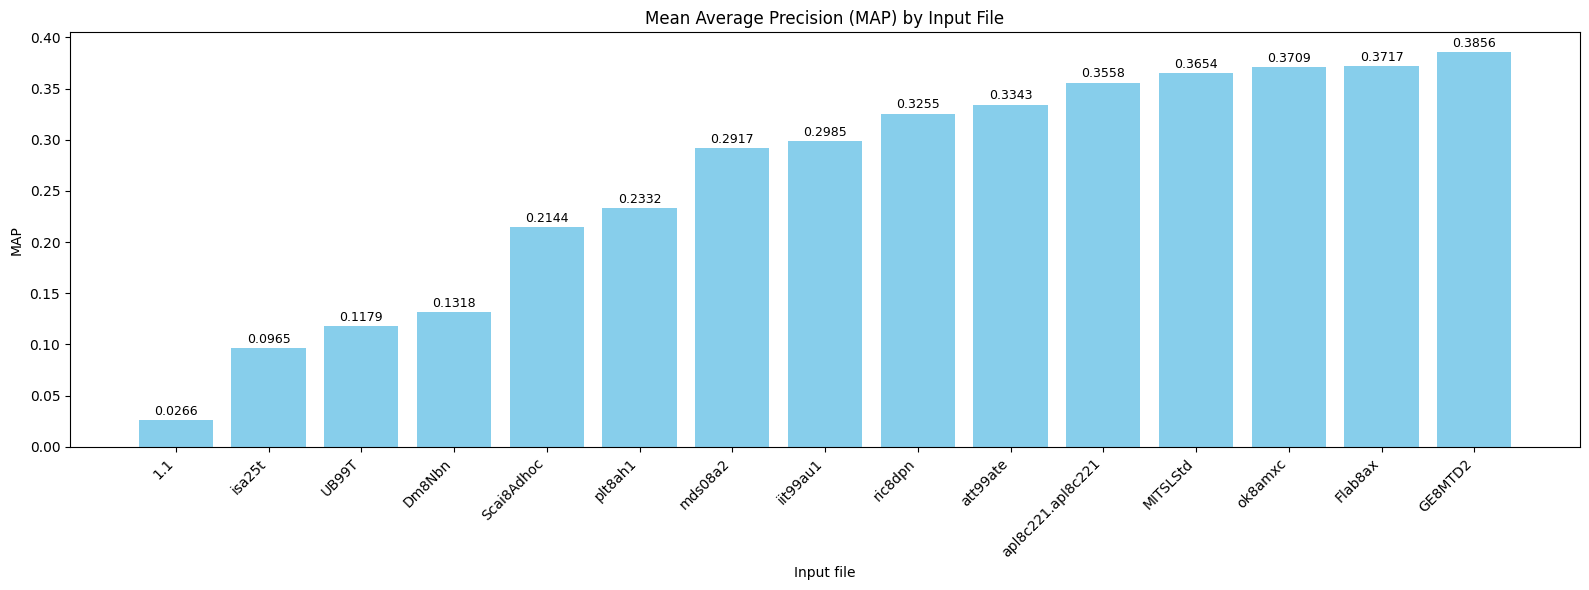

In [647]:
map_table_asc = mean_average_precision_table.sort_values('mean_average_precision')

plt.figure(figsize=[16, 6])

plt.bar(
  map_table_asc['input_file'], # x-axis values
  map_table_asc['mean_average_precision'], # y-axis values
  color='skyblue'
)

plt.xlabel('Input file')
plt.ylabel('MAP')
plt.title('Mean Average Precision (MAP) by Input File')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability

# Add values above bars
for i, v in enumerate(map_table_asc['mean_average_precision']):
    plt.text(i, v + 0.005, f"{v:.4f}", ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### Mean Reciprocal Rank (MRR)

MRR measures how well a information retrieval system ranks its first relevant document for each query. Below is the formula:

> MRR = (1 / |Q|) * (sum of (1 / ith-rank) from i = 1 to |Q|)

where |Q| = total number of queries, ith-rank = first relevant document for the ith query


To put it simply:
1. Find the first document that is relevant for a query
2. Compute the reciprocal of the rank for that query, i.e. (1 / rank)
3. Then, find the average of all reciprocal ranks for all queries
4. The mean of the average refers to the MRR value for an input file

#### Average Reciprocal Rank (ARR)

#### Mean Reciprocal Rank (MRR)

## Conclusion